In [1]:
# Loading important libraries
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and read the dataset

df = pd.read_csv('Storytelling_data.csv')

In [3]:
df.head(10)

,Timestamp,Name of college/ university you are studying in,In which state the college/ university is located?,Please mention the course name you are in,You are in which year of the undergraduate program,What are your subjects in your course?(broadly),Have you heard of any of these art forms used to narrate stories? Tick multiple,From which sources you have heard or seen of these picture art forms. Tick as many,In which alternative form have you seen these art forms? Tick as many,Have you ever thought of learning or understanding these art forms?,Do you feel telling stories through pictures is more engaging and attract people more?,Which is your native state or you belong to which state of India?,"In which state of India, you have spent your childhood?","Do you know any folk or regional art forms your region/state? If yes, please mention the name.",Do you feel that young generation should learn these forms to keep our culture alive?,"Are you aware of any Govt. schemes intended to to preserve, protect or conserve these beautiful art forms? If yes, please mention .","According to you, what should be done at the government /state level to create awareness about these traditional storytelling styles among masses?"
0,2025/04/02 2:53:19 PM GMT+5:30,FLAME University,Pune,Psychology,3 rd year,Psychology and Film,Kamishibai,Books;Art museums;Newspaper and magazines;Inte...,"Paintings;Clothes, garments etc",No,Yes,Delhi,Delhi,no,Yes,no,they should protect it
1,2025/04/02 8:45:10 PM GMT+5:30,"Zakir Husain delhi college, Delhi University",New delhi,Ba program,1st year,Arabic and history,None of the above,NaN,Haven't heard of any from above,Maybe,Yes,Jharkhand,Delhi,I do not know any forms of art as I'm not into...,Yes,None,Workshops in schools government offices and pl...
2,2025/04/02 9:28:24 PM GMT+5:30,Jaipur engineering college and research centre,Rajasthan,Bachelor of technology,2nd year,"Data structure, operating system, computer net...",Pattachitra Art;Kamishibai,Internet;Any other,Paintings,Maybe,Yes,Rajasthan,Rajasthan,"Phad painting, ghoomar, kalbelia",Yes,Not really,Maybe organizing storytelling festivals
3,2025/04/02 9:47:24 PM GMT+5:30,FLAME University,Pune,B.A. Psychology,Last year,Psychology and Advertising,Pattachitra Art;Chitrakathi,Books;Haats and fairs;Internet;Any other,Paintings;Ceramic crockery,Yes,Maybe,UP,Mumbai,no,Yes,not really,there should definitely be made provisions in ...
4,2025/04/02 9:55:26 PM GMT+5:30,Gargi College,Delhi,Bachelor in Elementary Education,2nd year,"lac, la, cl, hrc, pe, stcl, lo",Phad Painting;Chitrakathi,Haats and fairs;Internet,Paintings;Ceramic crockery,Maybe,Yes,Uttarakhand,Delhi,no,Yes,no,idk
5,2025/04/02 10:19:58 PM GMT+5:30,"Ramanujan college, University of Delhi",Delhi,Mathematics hons.,2nd year,"Multivariate calculus, Numerical Analysis, seq...",None of the above,NaN,I don't know about them,Maybe,Yes,Uttrakhand,Delhi,"No, I don't have idea about it",Yes,No I don't have any idea,Introducing subjects in college to promote lea...
6,2025/04/02 10:25:12 PM GMT+5:30,"Maharaja college, Rajasthan University",Jaipur Rajasthan,Bachelor of science,Final (Third) year,Physics Mathematics and geography,Phad Painting,Haats and fairs,Paintings,Yes,Yes,"Mewar , Rajasthan",Rajasthan,PHAD,Yes,No,Regional arts should be added to school curric...
7,2025/04/02 10:32:00 PM GMT+5:30,Jaipur national university,Rajasthan,Bachelor’s of physiotherapy,2nd year,"Medical subjects which include human anatomy, ...",Kamishibai,Any other,Paintings,Maybe,Yes,Rajasthan,Rajasthan,"Block printing, mandana art, kathputli, etc",Yes,No,Government should organise events around story...
8,2025/04/02 10:43:05 PM GMT+5:30,Delhi University,Delhi,B.el.ed,2nd year,"Language Acquisition, language across the curr...",None of the above,Books;Art museums;Haats and fairs;Internet,"Paintings;Clothes, garments etc",Yes,Yes,Bihar( Madhubani),Delhi,Mithila painting,Yes,No,It should be made a part of extracurricular ac...
9,2025/04/02 11:26:

In [4]:
# Set display and plot settings

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
df.head(10)

,Timestamp,Name of college/ university you are studying in,In which state the college/ university is located?,Please mention the course name you are in,You are in which year of the undergraduate program,What are your subjects in your course?(broadly),Have you heard of any of these art forms used to narrate stories? Tick multiple,From which sources you have heard or seen of these picture art forms. Tick as many,In which alternative form have you seen these art forms? Tick as many,Have you ever thought of learning or understanding these art forms?,Do you feel telling stories through pictures is more engaging and attract people more?,Which is your native state or you belong to which state of India?,"In which state of India, you have spent your childhood?","Do you know any folk or regional art forms your region/state? If yes, please mention the name.",Do you feel that young generation should learn these forms to keep our culture alive?,"Are you aware of any Govt. schemes intended to to preserve, protect or conserve these beautiful art forms? If yes, please mention .","According to you, what should be done at the government /state level to create awareness about these traditional storytelling styles among masses?"
0,2025/04/02 2:53:19 PM GMT+5:30,FLAME University,Pune,Psychology,3 rd year,Psychology and Film,Kamishibai,Books;Art museums;Newspaper and magazines;Inte...,"Paintings;Clothes, garments etc",No,Yes,Delhi,Delhi,no,Yes,no,they should protect it
1,2025/04/02 8:45:10 PM GMT+5:30,"Zakir Husain delhi college, Delhi University",New delhi,Ba program,1st year,Arabic and history,None of the above,NaN,Haven't heard of any from above,Maybe,Yes,Jharkhand,Delhi,I do not know any forms of art as I'm not into...,Yes,None,Workshops in schools government offices and pl...
2,2025/04/02 9:28:24 PM GMT+5:30,Jaipur engineering college and research centre,Rajasthan,Bachelor of technology,2nd year,"Data structure, operating system, computer net...",Pattachitra Art;Kamishibai,Internet;Any other,Paintings,Maybe,Yes,Rajasthan,Rajasthan,"Phad painting, ghoomar, kalbelia",Yes,Not really,Maybe organizing storytelling festivals
3,2025/04/02 9:47:24 PM GMT+5:30,FLAME University,Pune,B.A. Psychology,Last year,Psychology and Advertising,Pattachitra Art;Chitrakathi,Books;Haats and fairs;Internet;Any other,Paintings;Ceramic crockery,Yes,Maybe,UP,Mumbai,no,Yes,not really,there should definitely be made provisions in ...
4,2025/04/02 9:55:26 PM GMT+5:30,Gargi College,Delhi,Bachelor in Elementary Education,2nd year,"lac, la, cl, hrc, pe, stcl, lo",Phad Painting;Chitrakathi,Haats and fairs;Internet,Paintings;Ceramic crockery,Maybe,Yes,Uttarakhand,Delhi,no,Yes,no,idk
5,2025/04/02 10:19:58 PM GMT+5:30,"Ramanujan college, University of Delhi",Delhi,Mathematics hons.,2nd year,"Multivariate calculus, Numerical Analysis, seq...",None of the above,NaN,I don't know about them,Maybe,Yes,Uttrakhand,Delhi,"No, I don't have idea about it",Yes,No I don't have any idea,Introducing subjects in college to promote lea...
6,2025/04/02 10:25:12 PM GMT+5:30,"Maharaja college, Rajasthan University",Jaipur Rajasthan,Bachelor of science,Final (Third) year,Physics Mathematics and geography,Phad Painting,Haats and fairs,Paintings,Yes,Yes,"Mewar , Rajasthan",Rajasthan,PHAD,Yes,No,Regional arts should be added to school curric...
7,2025/04/02 10:32:00 PM GMT+5:30,Jaipur national university,Rajasthan,Bachelor’s of physiotherapy,2nd year,"Medical subjects which include human anatomy, ...",Kamishibai,Any other,Paintings,Maybe,Yes,Rajasthan,Rajasthan,"Block printing, mandana art, kathputli, etc",Yes,No,Government should organise events around story...
8,2025/04/02 10:43:05 PM GMT+5:30,Delhi University,Delhi,B.el.ed,2nd year,"Language Acquisition, language across the curr...",None of the above,Books;Art museums;Haats and fairs;Internet,"Paintings;Clothes, garments etc",Yes,Yes,Bihar( Madhubani),Delhi,Mithila painting,Yes,No,It should be made a part of extracurricular ac...
9,2025/04/02 11:26:

# Rename column names

In [6]:
# Remove extra spaces

cleaned_cols = [col.strip() for col in df.columns]
df.columns = cleaned_cols

In [7]:
new_dict = {
    "Timestamp": "Timestamp",
    "Name of college/ university you are studying in": "University",
    "In which state the college/ university is located?": "State",
    "Please mention the course name you are in": "Course",
    "You are in which year of the undergraduate program": "Year",
    "What are your subjects in your course?(broadly)": "Subjects",
    "Have you heard of any of these art forms used to narrate stories? Tick multiple": "Heard_Art_Forms",
    "From which sources you have heard or seen of these picture art forms. Tick as many": "Sources",
    "In which alternative form have you seen these art forms? Tick as many": "Alt_Forms",
    "Have you ever thought of learning or understanding these art forms?": "Interest_Learning",
    "Do you feel telling stories through pictures is more engaging and attract people more?": "Engaging",
    "Do you feel that young generation should learn these forms to keep our culture alive?": "Youth_Learn",
    "Are you aware of any Govt. schemes intended to to preserve, protect or conserve these beautiful art forms? If yes, please mention .": "Govt_Schemes",
    "According to you, what should be done at the government /statutory level to increase awareness about these traditional storytelling styles among masses?": "Suggestions"
}

In [8]:
# Normalize any other column

for col in df.columns:
    if col not in new_dict:
        # lowercase, replace non-alphanumeric with underscore, collapse multiple underscores
        safe = re.sub(r'[^0-9a-zA-Z]+', '_', col).strip('_').lower()
        new_dict[col] = safe


In [9]:
# Apply new names

df.rename(columns=new_dict, inplace=True)
print("Final column names:")
print(df.columns.tolist())

Final column names:
['Timestamp', 'University', 'State', 'Course', 'Year', 'Subjects', 'Heard_Art_Forms', 'Sources', 'Alt_Forms', 'Interest_Learning', 'Engaging', 'which_is_your_native_state_or_you_belong_to_which_state_of_india', 'in_which_state_of_india_you_have_spent_your_childhood', 'do_you_know_any_folk_or_regional_art_forms_your_region_state_if_yes_please_mention_the_name', 'Youth_Learn', 'Govt_Schemes', 'according_to_you_what_should_be_done_at_the_government_state_level_to_create_awareness_about_these_traditional_storytelling_styles_among_masses']


In [11]:
# Renaming columns
df.rename(columns={
    "Have you heard of any of these art forms used to narrate stories? Tick multiple": "Heard_Art_Forms",
    "From which sources you have heard or seen of these picture art forms. Tick as many": "Sources",
    "In which alternative form have you seen these art forms? Tick as many": "Alt_Forms",
    "Have you ever thought of learning or understanding these art forms?": "Interest_Learning",
    "Do you feel telling stories through pictures is more engaging and attract people more?": "Engaging",
    "Do you feel that young generation should learn these forms to keep our culture alive?": "Youth_Learn",
    "Are you aware of any Govt. schemes intended to to preserve, protect or conserve these beautiful art forms? If yes, please mention .": "Govt_Schemes",
    "According to you, what should be done at the government /statutory level to increase awareness about these traditional storytelling styles among masses?": "Suggestions"
}, inplace=True)

# Verifying column names immediately
print(df.columns)


Index(['Timestamp', 'University', 'State', 'Course', 'Year', 'Subjects',
       'Heard_Art_Forms', 'Sources', 'Alt_Forms', 'Interest_Learning',
       'Engaging',
       'which_is_your_native_state_or_you_belong_to_which_state_of_india',
       'in_which_state_of_india_you_have_spent_your_childhood',
       'do_you_know_any_folk_or_regional_art_forms_your_region_state_if_yes_please_mention_the_name',
       'Youth_Learn', 'Govt_Schemes',
       'according_to_you_what_should_be_done_at_the_government_state_level_to_create_awareness_about_these_traditional_storytelling_styles_among_masses'],
      dtype='object')


In [12]:
# Strip leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Verify the final column names
print(df.columns)


Index(['Timestamp', 'University', 'State', 'Course', 'Year', 'Subjects',
       'Heard_Art_Forms', 'Sources', 'Alt_Forms', 'Interest_Learning',
       'Engaging',
       'which_is_your_native_state_or_you_belong_to_which_state_of_india',
       'in_which_state_of_india_you_have_spent_your_childhood',
       'do_you_know_any_folk_or_regional_art_forms_your_region_state_if_yes_please_mention_the_name',
       'Youth_Learn', 'Govt_Schemes',
       'according_to_you_what_should_be_done_at_the_government_state_level_to_create_awareness_about_these_traditional_storytelling_styles_among_masses'],
      dtype='object')


In [13]:
# Manually assigning the cleaned-up column names
df.columns = ['Timestamp', 'University', 'State', 'Course', 'Year', 'Subjects', 
              'Heard_Art_Forms', 'Sources', 'Alt_Forms', 'Interest_Learning', 
              'Engaging', 'Native_State', 'Childhood_State', 'Folk_Art_Knowledge', 
              'Youth_Learn', 'Govt_Schemes', 'Suggestions']

# Verifying final column names
print(df.columns)


Index(['Timestamp', 'University', 'State', 'Course', 'Year', 'Subjects',
       'Heard_Art_Forms', 'Sources', 'Alt_Forms', 'Interest_Learning',
       'Engaging', 'Native_State', 'Childhood_State', 'Folk_Art_Knowledge',
       'Youth_Learn', 'Govt_Schemes', 'Suggestions'],
      dtype='object')


In [14]:
df.head()

,Timestamp,University,State,Course,Year,Subjects,Heard_Art_Forms,Sources,Alt_Forms,Interest_Learning,Engaging,Native_State,Childhood_State,Folk_Art_Knowledge,Youth_Learn,Govt_Schemes,Suggestions
0,2025/04/02 2:53:19 PM GMT+5:30,FLAME University,Pune,Psychology,3 rd year,Psychology and Film,Kamishibai,Books;Art museums;Newspaper and magazines;Inte...,"Paintings;Clothes, garments etc",No,Yes,Delhi,Delhi,no,Yes,no,they should protect it
1,2025/04/02 8:45:10 PM GMT+5:30,"Zakir Husain delhi college, Delhi University",New delhi,Ba program,1st year,Arabic and history,None of the above,NaN,Haven't heard of any from above,Maybe,Yes,Jharkhand,Delhi,I do not know any forms of art as I'm not into...,Yes,None,Workshops in schools government offices and pl...
2,2025/04/02 9:28:24 PM GMT+5:30,Jaipur engineering college and research centre,Rajasthan,Bachelor of technology,2nd year,"Data structure, operating system, computer net...",Pattachitra Art;Kamishibai,Internet;Any other,Paintings,Maybe,Yes,Rajasthan,Rajasthan,"Phad painting, ghoomar, kalbelia",Yes,Not really,Maybe organizing storytelling festivals
3,2025/04/02 9:47:24 PM GMT+5:30,FLAME University,Pune,B.A. Psychology,Last year,Psychology and Advertising,Pattachitra Art;Chitrakathi,Books;Haats and fairs;Internet;Any other,Paintings;Ceramic crockery,Yes,Maybe,UP,Mumbai,no,Yes,not really,there should definitely be made provisions in ...
4,2025/04/02 9:55:26 PM GMT+5:30,Gargi College,Delhi,Bachelor in Elementary Education,2nd year,"lac, la, cl, hrc, pe, stcl, lo",Phad Painting;Chitrakathi,Haats and fairs;Internet,Paintings;Ceramic crockery,Maybe,Yes,Uttarakhand,Delhi,no,Yes,no,idk


# Count top story forms

In [15]:
# Explode multi-select answers to individual rows

all_forms = (
    df["Heard_Art_Forms"]
    .dropna()
    .astype(str)
    .str.split(',')
    .explode()
    .str.strip()
)


In [16]:
# 4. Count frequencies
freq = all_forms.value_counts().reset_index()
freq.columns = ["Art_Form", "Count"]

In [17]:
print(freq)

                                             Art_Form  Count
0                                   None of the above     46
1                                     Pattachitra Art      9
2                         Pattachitra Art;Chitrakathi      8
3                                         Chitrakathi      7
4                                       Phad Painting      6
5            Kaavad Katha;Pattachitra Art;Chitrakathi      5
6                       Phad Painting;Pattachitra Art      4
7                                          Kamishibai      3
8           Phad Painting;Pattachitra Art;Chitrakathi      2
9                                        Kaavad Katha      2
10                          Phad Painting;Chitrakathi      2
11  Kaavad Katha;Phad Painting;Pattachitra Art;Chi...      2
12                Kaavad Katha;Chitrakathi;Kamishibai      1
13         Kaavad Katha;Phad Painting;Pattachitra Art      1
14                           Kaavad Katha;Chitrakathi      1
15                      

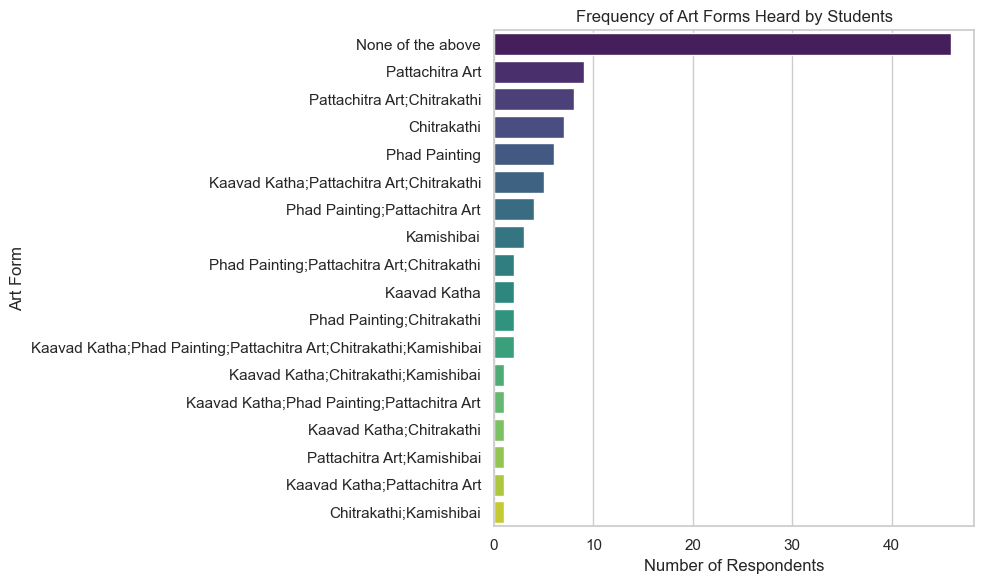

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=freq, x="Count", y="Art_Form", palette="viridis")
plt.title("Frequency of Art Forms Heard by Students")
plt.xlabel("Number of Respondents")
plt.ylabel("Art Form")
plt.tight_layout()
plt.show()

In [ ]:
# 1. “None of the above” Dominates (≈45 students)- Almost half the respondents haven’t heard of any of the listed art forms, underscoring a major awareness gap.
# 2. Top Named Forms

Pattachitra Art (~33 respondents)

Chitrakathi (~29 respondents)

Phad Painting (~17 respondents)
These three traditional styles are the most recognized, but still reach fewer than one-third of all students.
# 3. Moderate Awareness

Kaavad Katha (~13 respondents)

Kamishibai (~8 respondents)
Both are known by a minority, suggesting niche or region-specific exposure.

# Demographic Analysis

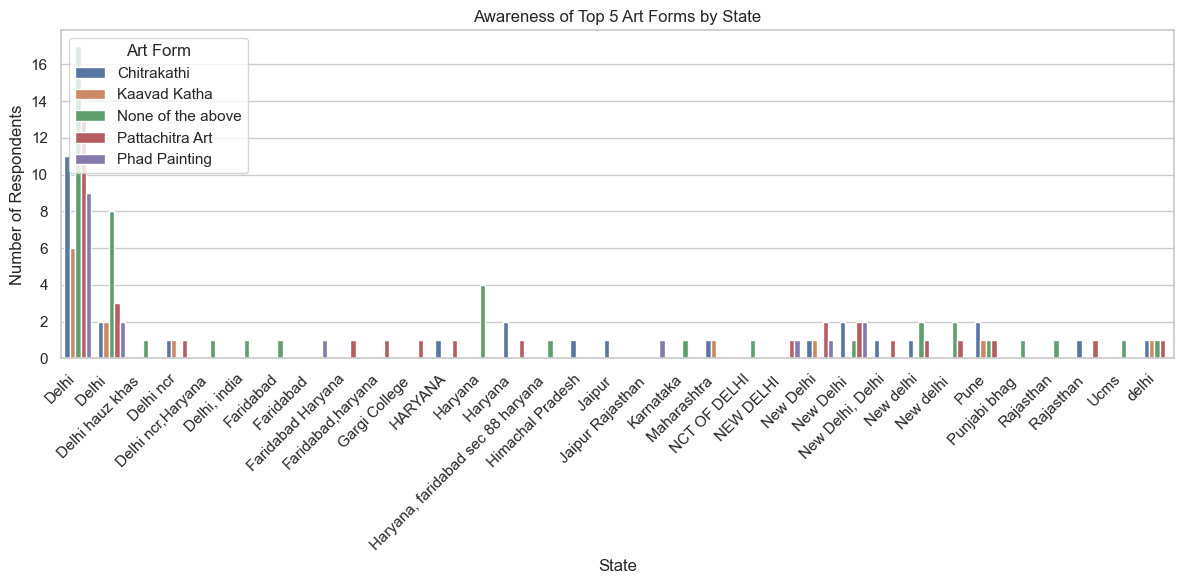

In [22]:
# Explode multi-select answers

df_exploded = (
    df[["Heard_Art_Forms", "State", "Course"]]
      .dropna(subset=["Heard_Art_Forms"])
      .assign(Heard_Art_Forms=lambda d: d["Heard_Art_Forms"]
              .str.replace(";", ",")
              .str.split(","))
      .explode("Heard_Art_Forms")
)
df_exploded["Heard_Art_Forms"] = df_exploded["Heard_Art_Forms"].str.strip()

top = (
    df_exploded["Heard_Art_Forms"]
      .value_counts()
      .nlargest(5)
      .index
)
df_top = df_exploded[df_exploded["Heard_Art_Forms"].isin(top)]

state_counts = (
    df_top
      .groupby(["State", "Heard_Art_Forms"])
      .size()
      .reset_index(name="Count")
)
plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x="State", y="Count", hue="Heard_Art_Forms")
plt.title("Awareness of Top 5 Art Forms by State")
plt.ylabel("Number of Respondents")
plt.xlabel("State")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Art Form")
plt.tight_layout()
plt.show()

In [23]:
df['State'].value_counts()

State
Delhi                                 36
Delhi                                 14
Pune                                   5
New Delhi                              4
Haryana                                4
New Delhi                              3
New delhi                              3
Rajasthan                              3
New delhi                              3
Haryana                                2
delhi                                  2
NEW DELHI                              1
Himachal Pradesh                       1
NCT OF DELHI                           1
Jaipur                                 1
Ucms                                   1
Delhi ncr,Haryana                      1
Faridabad,haryana                      1
Faridabad                              1
Faridabad Haryana                      1
Delhi hauz khas                        1
HARYANA                                1
Faridabad                              1
Haryana, faridabad sec 88 haryana      1
Delhi ncr 

In [24]:
# Clean State names

# First, convert the 'State' column to string and remove any extra spaces
df["State"] = df["State"].astype(str).str.strip()

# Create an empty list to hold the cleaned state values
clean_states = []

# Go through each value in the 'State' column
for state in df["State"]:
    s = state.lower()
    
    # Group all variations of Delhi
    if "delhi" in s or "nct" in s or "ucms" in s or "hauz khas" in s or "gargi" in s or "punjabi bhag" in s:
        clean_states.append("Delhi")
    
    # Group all Haryana-related responses
    elif "haryana" in s or "faridabad" in s:
        clean_states.append("Haryana")
    
    # Group Rajasthan
    elif "rajasthan" in s or "jaipur" in s:
        clean_states.append("Rajasthan")
    
    # Group Maharashtra (Pune/Mumbai)
    elif "pune" in s or "maharashtra" in s or "mumbai" in s:
        clean_states.append("Maharashtra")
    
    # Group Himachal Pradesh
    elif "himachal" in s:
        clean_states.append("Himachal Pradesh")
    
    # Group Karnataka
    elif "karnataka" in s:
        clean_states.append("Karnataka")
    
    # Anything else goes into 'Other'
    else:
        clean_states.append("Other")

# Add the cleaned list as a new column in the dataframe
df["State_Clean"] = clean_states

# Finally, show the grouped counts
print(df["State_Clean"].value_counts())


State_Clean
Delhi               75
Haryana             12
Rajasthan            7
Maharashtra          6
Himachal Pradesh     1
Karnataka            1
Name: count, dtype: int64


In [29]:
df_filtered = df[["State_Clean", "Heard_Art_Forms"]].dropna()


In [31]:
# Create a list to hold each (State, Art_Form) pair
entries = []

for i in range(len(df_filtered)):
    state = df_filtered.iloc[i]["State_Clean"]
    raw = df_filtered.iloc[i]["Heard_Art_Forms"]

    # Replace semicolon with comma and split the string
    items = raw.replace(";", ",").split(",")
    
    # Strip whitespace and collect non-empty entries
    for item in items:
        cleaned = item.strip()
        if cleaned:
            entries.append((state, cleaned))

# Step 3: Convert list to DataFrame
exploded_df = pd.DataFrame(entries, columns=["State", "Art_Form"])

# Step 4: Count how many times each art form is mentioned per state
statewise_counts = exploded_df.groupby(["State", "Art_Form"]).size().unstack(fill_value=0)

# Step 5: Display the full table
print("Art Form Mentions by State:")
print(statewise_counts)

Art Form Mentions by State:
Art_Form          Chitrakathi  Kaavad Katha  Kamishibai  None of the above  \
State                                                                        
Delhi                      20            11           2                 37   
Haryana                     3             0           0                  6   
Himachal Pradesh            1             0           1                  0   
Karnataka                   0             0           0                  1   
Maharashtra                 3             2           2                  1   
Rajasthan                   2             0           3                  1   

Art_Form          Pattachitra Art  Phad Painting  
State                                             
Delhi                          27             15  
Haryana                         4              1  
Himachal Pradesh                0              0  
Karnataka                       0              0  
Maharashtra                     1        

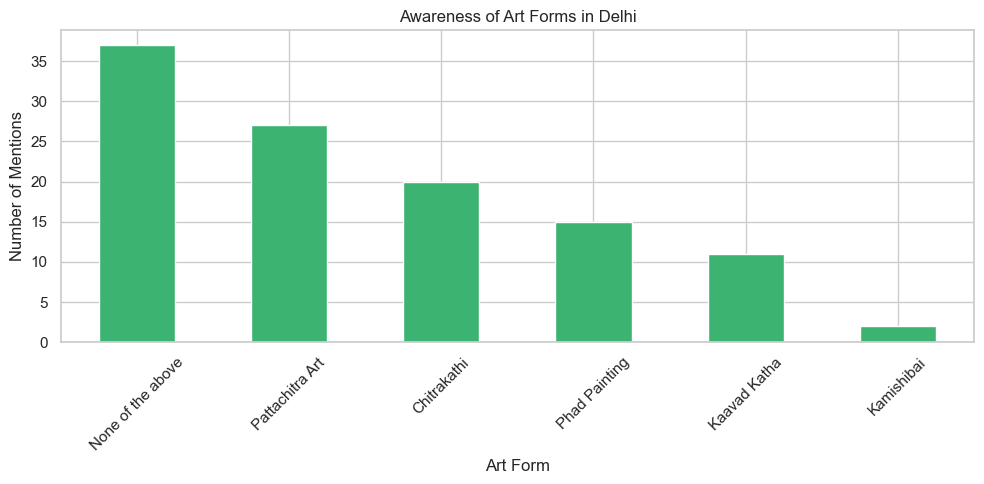

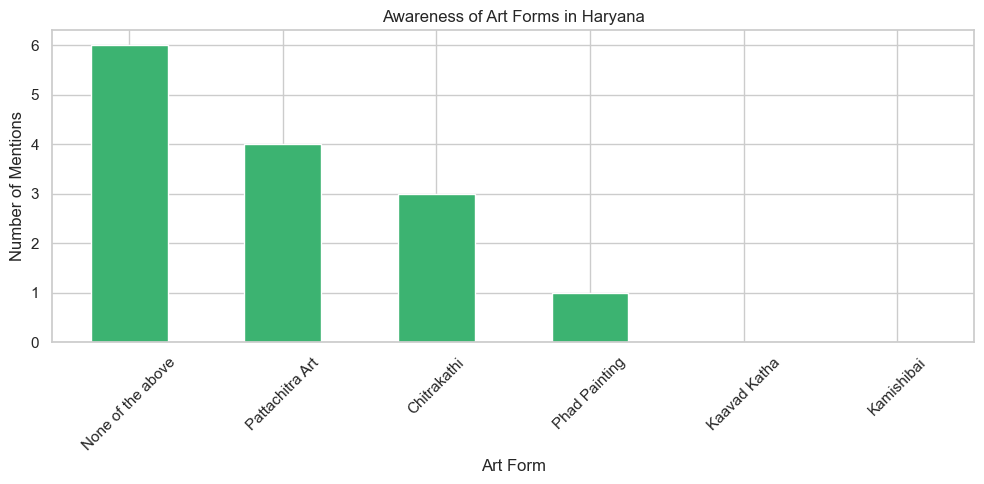

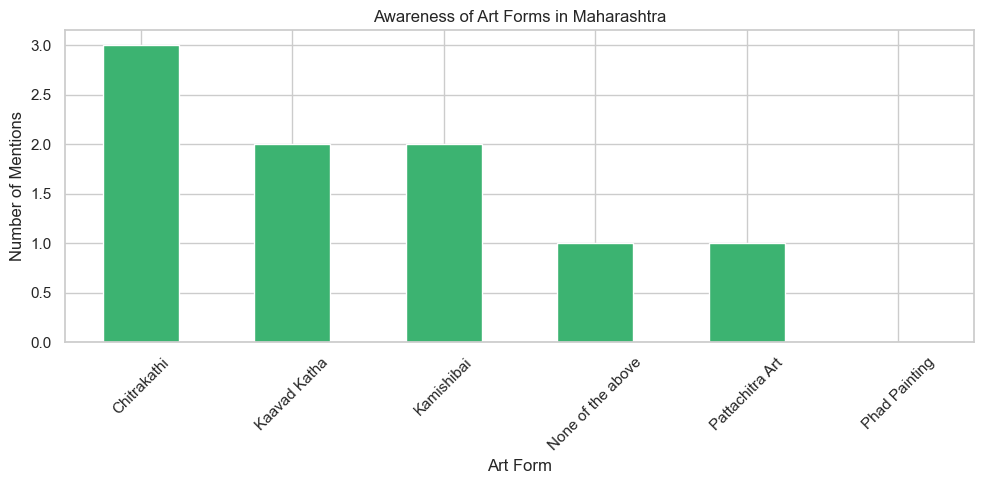

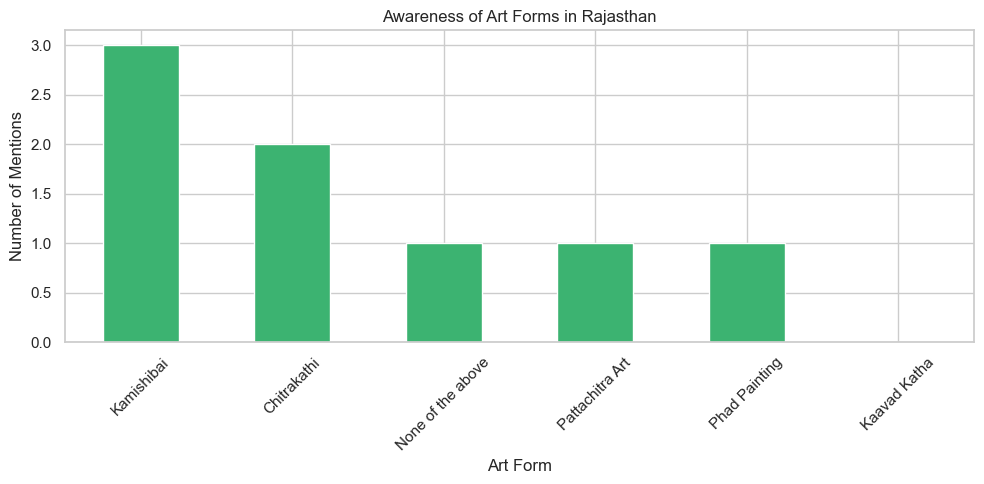

In [32]:
# Step 6: Plot a bar chart for each state with sufficient data
for state in statewise_counts.index:
    data = statewise_counts.loc[state]
    total = data.sum()
    
    if total >= 3:  # Skip very low response states
        sorted_data = data.sort_values(ascending=False)
        
        plt.figure(figsize=(10, 5))
        sorted_data.plot(kind='bar', color='mediumseagreen')
        plt.title(f"Awareness of Art Forms in {state}")
        plt.xlabel("Art Form")
        plt.ylabel("Number of Mentions")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


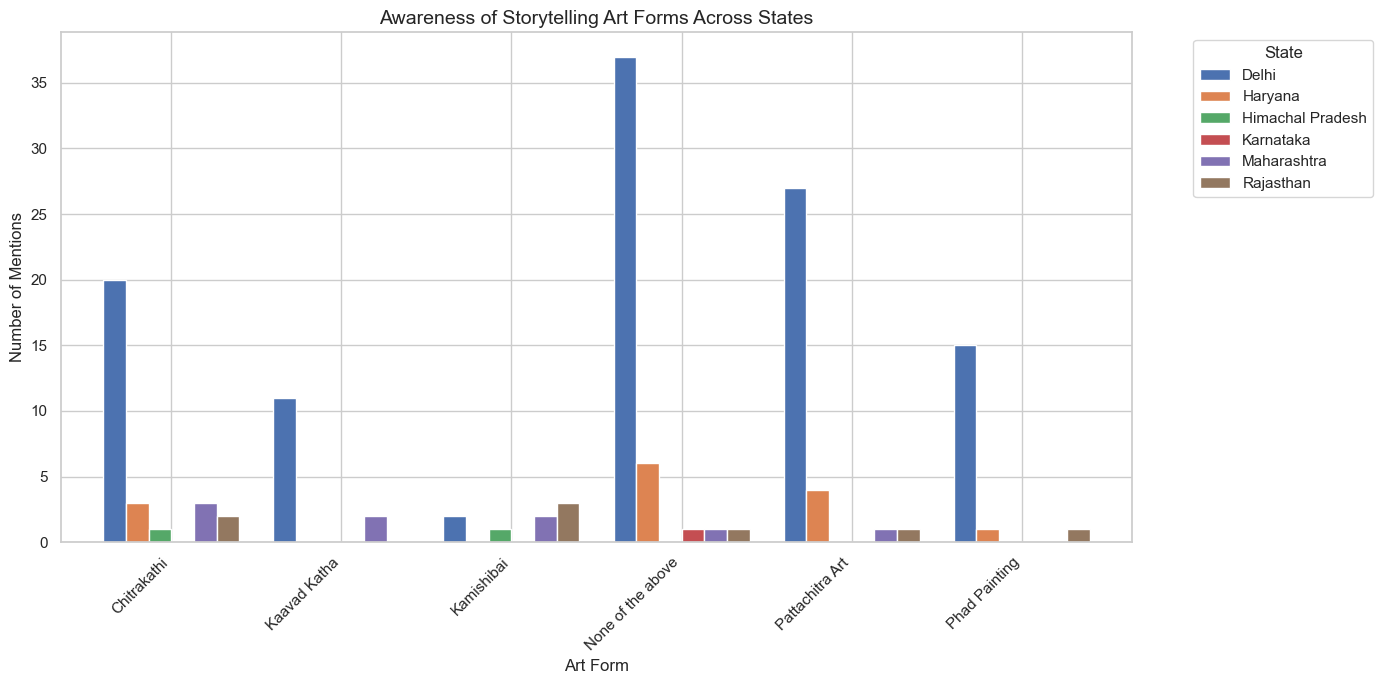

In [33]:
pivot_df = exploded_df.groupby(["Art_Form", "State"]).size().unstack(fill_value=0)

# Step 3: Plot the grouped bar chart
pivot_df.plot(kind="bar", figsize=(14, 7), width=0.8)

plt.title("Awareness of Storytelling Art Forms Across States", fontsize=14)
plt.xlabel("Art Form", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Observations

Delhi dominates awareness across almost all art forms.

"None of the above" has the highest mentions — especially from Delhi — showing a potential lack of awareness.

Other states (Haryana, Maharashtra, Rajasthan, etc.) show low but present awareness — with small contributions to specific art forms like:

Phad Painting (Rajasthan, as expected)

Kaavad Katha and Chitrakathi (Maharashtra, Delhi)

# Awareness by Course

In [38]:
df['Course'].value_counts()

Course
Bsc nursing                                       9
B.el.ed                                           8
B.EL.ED                                           4
B.El.Ed                                           3
Nursing                                           2
                                                 ..
B.A.(Hons)Political Science                       1
Political Science                                 1
BA HONS ECONOMICS                                 1
 Bachelor of Arts Honours in Political Science    1
B.A(Prog.)                                        1
Name: count, Length: 77, dtype: int64

In [39]:
import pandas as pd

# Assume df["Course"] already exists
courses = df["Course"].astype(str).str.strip()

# Prepare a list to collect the category for each row
course_categories = []

# Loop over every course entry
for course in courses:
    c_lower = course.lower()
    
    # Science & Technology keywords
    if any(kw in c_lower for kw in [
        "bsc", "b.tech", "b tech", "m.sc", "engineering", 
        "nursing", "b.e", "b.e.", "b.e(", "b pharm", "bpharm"
    ]):
        course_categories.append("Science & Technology")
    
    # Commerce keywords
    elif any(kw in c_lower for kw in [
        "b.com", "commerce", "economics", "bba", "mba", 
        "accounting", "finance"
    ]):
        course_categories.append("Commerce")
    
    # Humanities (default catch-all)
    else:
        course_categories.append("Humanities")

# Add the new column to your DataFrame
df["Course_Category"] = course_categories

# Now, see how many fall into each category
print(df["Course_Category"].value_counts())


Course_Category
Humanities              48
Science & Technology    47
Commerce                 7
Name: count, dtype: int64


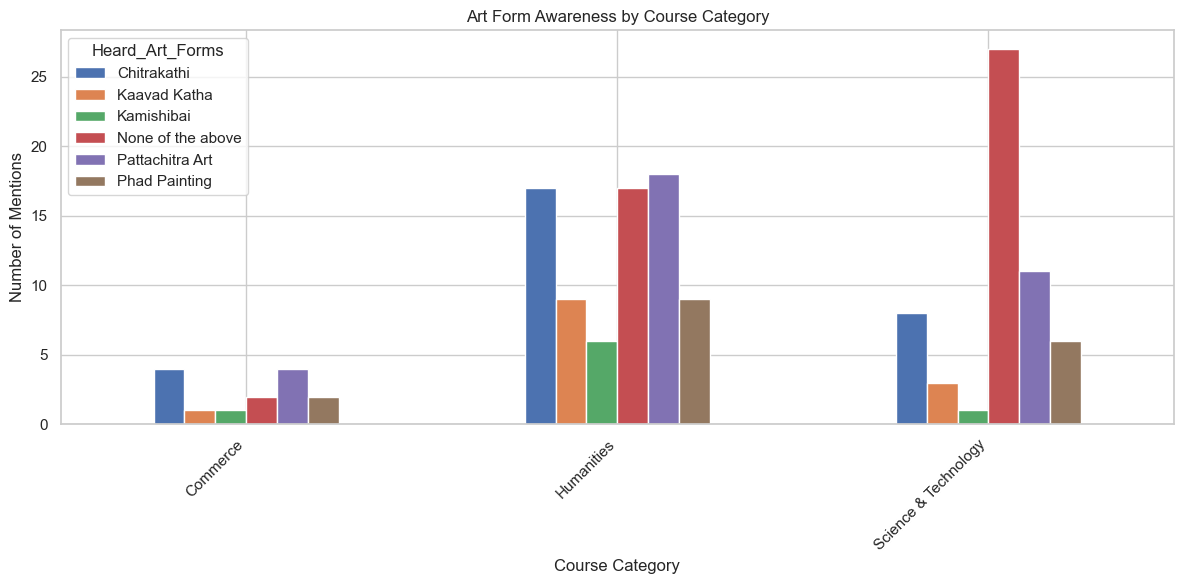

In [40]:

# 1. Clean and filter the dataset
df_filtered = df[["Course_Category", "Heard_Art_Forms"]].dropna()

# 2. Split the multi-select art forms into separate rows
df_exploded = df_filtered.dropna(subset=["Heard_Art_Forms"]).assign(
    Heard_Art_Forms=lambda x: x["Heard_Art_Forms"].str.replace(";", ",").str.split(",")
).explode("Heard_Art_Forms")

# 3. Clean up the art forms (strip extra spaces)
df_exploded["Heard_Art_Forms"] = df_exploded["Heard_Art_Forms"].str.strip()

# 4. Create a cross-tabulation of course category vs. art form awareness
course_art_crosstab = pd.crosstab(df_exploded["Course_Category"], df_exploded["Heard_Art_Forms"])

# 5. Plot a grouped bar chart for art form awareness by course category
course_art_crosstab.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.title("Art Form Awareness by Course Category")
plt.xlabel("Course Category")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [41]:
# Observations: As expected Humanities students are most aware of storytelling forms. The reason behind may be their exposure to literature.


Overall Interest in Learning:
Interest_Learning
Maybe    40
No       32
Yes      30
Name: count, dtype: int64


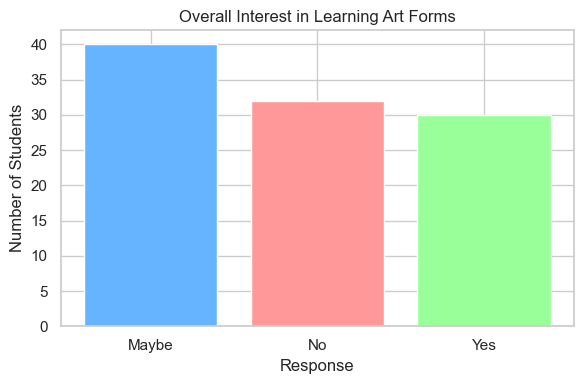


Interest in Learning by Course Category:
Course_Category    Commerce  Humanities  Science & Technology
Interest_Learning                                            
Maybe                     1          32                     7
No                        2          15                    15
Yes                       4          19                     7


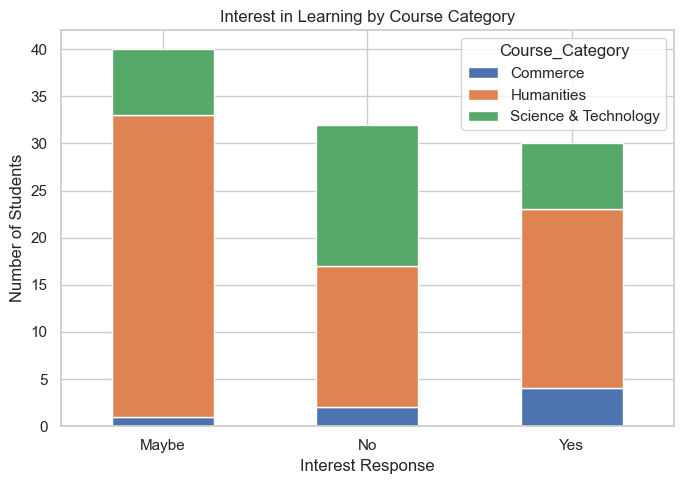

In [43]:
# Learning Interest Analysis

import pandas as pd
import matplotlib.pyplot as plt

# 1. Standardize Interest_Learning
df['Interest_Learning'] = (
    df['Interest_Learning']
      .astype(str)
      .str.strip()
      .str.capitalize()
      .replace({'Y': 'Yes', 'N': 'No'})
)

# 2. Overall counts and bar chart
interest_counts = df['Interest_Learning'].value_counts()
print("Overall Interest in Learning:")
print(interest_counts)

plt.figure(figsize=(6,4))
plt.bar(interest_counts.index, interest_counts.values, color=['#66b3ff','#ff9999','#99ff99'])
plt.title("Overall Interest in Learning Art Forms")
plt.xlabel("Response")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# 3. Classify Course into three categories
def classify_course(c):
    c = str(c).lower()
    if any(k in c for k in ['bsc','engineering','nursing','b.tech','b e','m.sc','pharm']):
        return 'Science & Technology'
    if any(k in c for k in ['b.com','commerce','economics','bba','accounting','finance']):
        return 'Commerce'
    return 'Humanities'

df['Course_Category'] = df['Course'].apply(classify_course)

# 4. Interest by Course_Category
by_course = pd.crosstab(df['Interest_Learning'], df['Course_Category'])
print("\nInterest in Learning by Course Category:")
print(by_course)

by_course.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Interest in Learning by Course Category")
plt.xlabel("Interest Response")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
# As expected Humanities students have highest interest in learning rate


In [47]:
df['Govt_Schemes'].value_counts()

Govt_Schemes
No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      63


In [50]:
# Almost negligible awareness of govt. schemes wrt the collected data.

# Suggestion Analysis

In [51]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


            Word  Count
0            art     28
1         school     19
2          forms     18
3      awareness     17
4   storytelling     16
5    traditional     16
6     government     13
7         people     13
8       cultural     12
9      workshops     11
10    curriculum     11
11        create     10
12          make     10
13        events      9
14         media      9


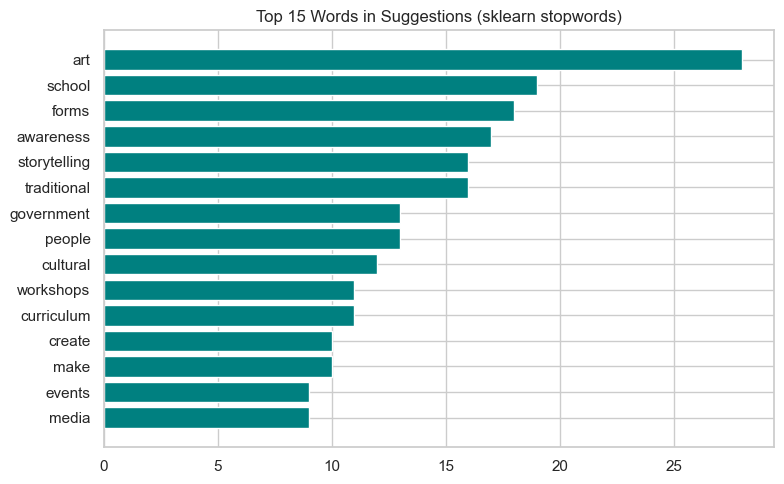

In [58]:
# Clean Suggestions Column

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
suggestions = df['Suggestions'].dropna().astype(str).str.lower()

# Clean & tokenize, excluding ENGLISH_STOP_WORDS
cleaned = []
for text in suggestions:
    # remove non-letters
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    # filter out stopwords
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS]
    cleaned.append(tokens)

# Flatten & count
all_words = [w for sub in cleaned for w in sub]
freq = Counter(all_words).most_common(15)
top_df = pd.DataFrame(freq, columns=['Word','Count'])
print(top_df)

# Bar chart
plt.figure(figsize=(8,5))
plt.barh(top_df['Word'][::-1], top_df['Count'][::-1], color='teal')
plt.title('Top 15 Words in Suggestions (sklearn stopwords)')
plt.tight_layout()
plt.show()



# Word Frequency

In [54]:
# Count the frequency of each word
word_freq = Counter(all_words)

# Get the top 15 most common words
top_words = word_freq.most_common(15)

# Create a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
print(top_words_df)


            Word  Frequency
0            and         83
1             to         51
2             in         48
3            the         35
4         should         32
5             be         28
6            art         28
7          these         22
8             of         21
9             it         19
10        school         19
11         forms         18
12     awareness         17
13           can         16
14  storytelling         16


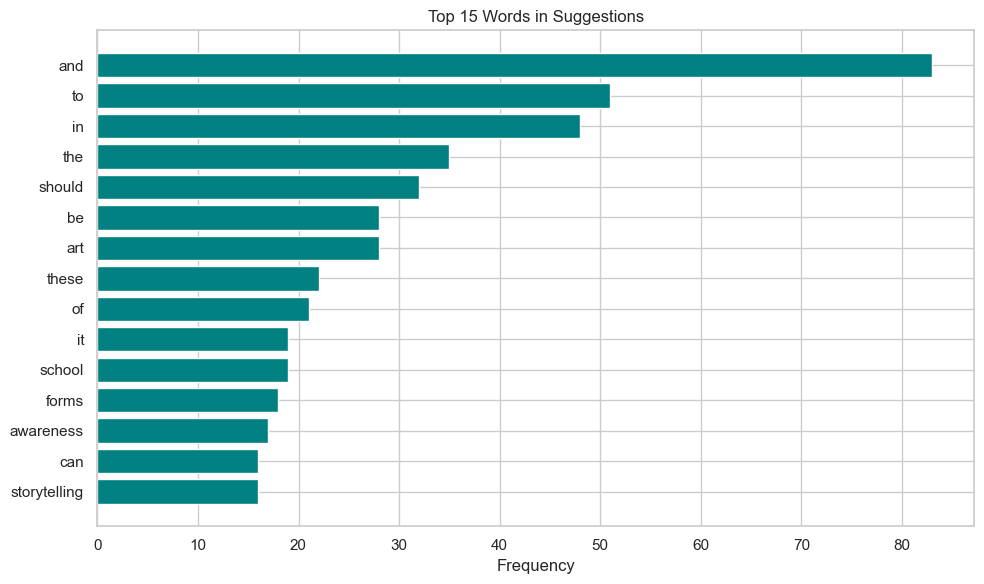

In [55]:
# Plot a bar chart for top 15 most common words
plt.figure(figsize=(10, 6))
plt.barh(top_words_df['Word'][::-1], top_words_df['Frequency'][::-1], color='teal')
plt.title("Top 15 Words in Suggestions")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


# WordCloud

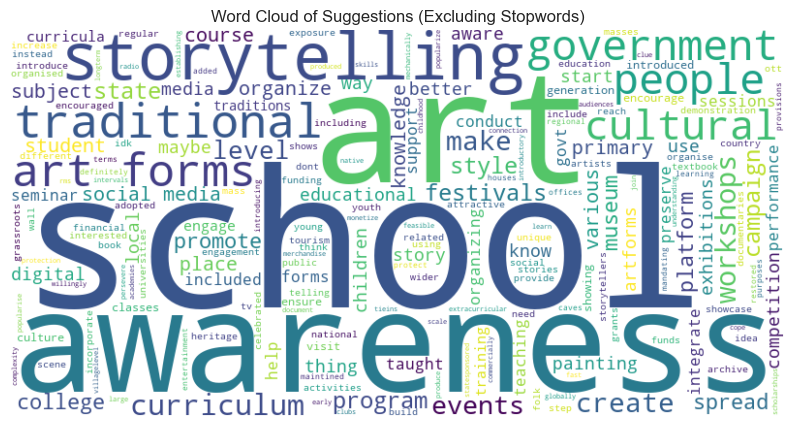

In [60]:
# Join into one long string
word_string = ' '.join(all_words)

# 5. Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(word_string)

# 6. Display it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suggestions (Excluding Stopwords)')
plt.show()

# LDA Topic Modeling

In [63]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 2. Prepare the text data
texts = df['Suggestions'].dropna().astype(str).str.lower().tolist()

# 3. Clean each text (remove punctuation, numbers, etc.)
cleaned_texts = []
for t in texts:
    t = re.sub(r'[^a-z\s]', ' ', t)   # remove punctuation and numbers
    cleaned_texts.append(t)

# 4. Manually define the stop words
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 
    'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 
    'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
]

# 5. Vectorize the text data excluding stopwords
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(cleaned_texts)

# 6. Fit LDA model (3 topics)
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(X)

# 7. Print out the top 8 words for each topic
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-8:][::-1]
    top_terms = [terms[i] for i in top_indices]
    print(f"Topic {topic_idx+1}: {', '.join(top_terms)}")


Topic 1: people, art, forms, traditional, awareness, schools, spread, campaigns
Topic 2: cultural, storytelling, school, events, government, workshops, art, awareness
Topic 3: art, traditional, create, storytelling, school, forms, level, awareness


In [ ]:
Topic #	Top Words	Theme	What It Means & Next Steps
1	people, art, forms, traditional, awareness, schools, spread, campaigns	Awareness & Outreach	Respondents are calling for broad campaigns—in schools and communities—to spread awareness of traditional art forms.
Next Steps:
• Partner with educational boards to embed “Picture Storytelling” modules into school curricula.
• Launch on-campus art fairs and “art-form roadshows” that travel to multiple colleges.
2	cultural, storytelling, school, events, government, workshops, art, awareness	Government-led Educational Events	This cluster stresses government-organized workshops and events in educational settings to promote cultural storytelling.
Next Steps:
• Design a series of state-sponsored “Story Through Art” workshops in collaboration with local artists.
• Host annual storytelling festivals supported by the Department of Culture, with booths for Pattachitra, Phad, etc.
3	art, traditional, create, storytelling, school, forms, level, awareness	Curriculum Integration & Creation	Here the focus is on creating formal educational content at the school (and possibly university) level—e.g., courses, modules, or PA (project assignments)—to ensure sustained exposure.
Next Steps:
• Develop a teacher’s toolkit on traditional picture-storytelling art, complete with lesson plans and materials.
• Work with boards (CBSE/State Boards) to introduce an elective course on “Visual Storytelling” at the 10th–12th grade level.

